In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
class Dataset():
    
    def __init__(self,file,scaleMethod):
        self.file = file
        self.scaleMethod = scaleMethod
        
    def importDataset(self,normalised=True):
        
        data = pd.read_csv(self.file)
        dataS = data.drop('Unnamed: 0',axis=1)
        self.normalise = normalised
        if not normalised:
            X = dataS.iloc[:,:7].values
            Y = dataS.iloc[:,7:].values
            X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)
        
        elif self.scaleMethod == 'Standard':
            self.scaler = StandardScaler()
            self.scaler.fit(dataS)
            dataS = self.scaler.transform(dataS)
            X = dataS[:,:7]
            Y = dataS[:,7:]
            X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)
    
        elif self.scaleMethod == 'MinMax':
            self.scaler = MinMaxScaler(feature_range=(0,1))
            self.scaler.fit(dataS)
            dataS = self.scaler.transform(dataS)
            X = dataS[:,:7]
            Y = dataS[:,7:]
            X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

        return X_train,X_test,Y_train,Y_test
    
    def inverseTransform(self,*arr):
        
        data = np.concatenate(arr,axis=1)
        data = pd.DataFrame(data)
        arrInverse = self.scaler.inverse_transform(data)

        return arrInverse
    
    def cost(self,y_test,y_pred):

        error = (y_test-y_pred)/y_test
        error = np.sum(abs(error))/(y_test.shape[0]*y_test.shape[1])*100
        
        return error
    
    def rmse(self,y_test,y_pred):
        error = np.sum((y_test-y_pred)**2)
        error = error/(y_test.shape[0]*y_test.shape[1])
        error = math.sqrt(error)
        return error
    
    def errorMagnitude(self,y_true,y_pred):
    
        minMag = min([min(abs(i)) for i in y_true-y_pred])
        maxMag = max([max(abs(i)) for i in y_true-y_pred])

        return (minMag,maxMag)
    
    def train(self,X_train,Y_train,X_test,Y_test,Model,giveMagnitude=False):
        
        Ytr_pred = Model.predict(X_train.T).T
        Yts_pred = Model.predict(X_test.T).T
        
        if not self.normalise:
            error = self.rmse(Y_test,Yts_pred)
            error_tr = self.rmse(Y_train,Ytr_pred)

            if giveMagnitude:
                magnitude = self.errorMagnitude(Y_test,Yts_pred)
                return (error_tr,error,magnitude)
        else:
            true = self.inverseTransform(X_train,Y_train)
            pred = self.inverseTransform(X_train,Ytr_pred)

            error_tr = self.rmse(true[:,7:],pred[:,7:])

            true = self.inverseTransform(X_test,Y_test)
            pred = self.inverseTransform(X_test,Yts_pred)

            error = self.rmse(true[:,7:],pred[:,7:])

            if giveMagnitude:
                magnitude = self.errorMagnitude(true[:,7:],pred[:,7:])
                return (error_tr,error,magnitude)

        return (error_tr,error)

In [3]:
class ELM():
    
    def __init__(self,nodes):
        self.neurons = nodes
    
    def sigmoid(self,z):
        
        s = 1/(1+np.exp(-z))
        return s
    
    def tanh(self,z):
        s = np.tanh(z)
        return s
    
    def initlialization(self,X):
        
        self.W = np.random.randn(self.neurons,X.shape[0])
        self.b = np.ones(shape=(self.neurons,1))
        
    def fit(self,X,Y):
        
        self.initlialization(X)
        z = np.dot(self.W,X)+self.b
        H = self.sigmoid(z)
        self.B = np.dot(Y,np.linalg.pinv(H))
    
    def predict(self,X):
        z = np.dot(self.W,X)+self.b
        H = self.sigmoid(z)
        y_pred = np.dot(self.B,H)
        
        return y_pred

In [4]:
values = []
dataClass = Dataset(file='Dataset/Static_Model/15000DwithQuat.csv',scaleMethod='MinMax')
X_train,X_test,Y_train,Y_test = dataClass.importDataset()
for i in range(10,100):
    elm = ELM(nodes=i)
    elm.fit(X_train.T,Y_train.T)
    val = dataClass.train(X_train,Y_train,X_test,Y_test,elm,giveMagnitude=True)
    values.append(val)

In [5]:
import matplotlib.pyplot as plt

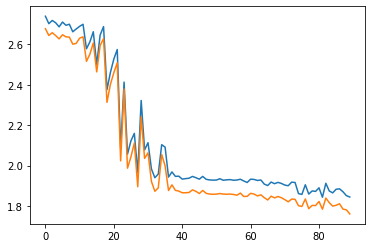

In [6]:
plt.plot([i[1] for i in values])
plt.plot([i[0] for i in values])

In [7]:
values

[(2.6771706615896225,
  2.7389591449889963,
  (0.00029084137583268443, 6.805243107957995)),
 (2.6437777809373175,
  2.702180717124464,
  (2.282847582080194e-07, 6.580230647472931)),
 (2.657508420568334,
  2.718161897815755,
  (0.00038897974140006397, 6.793310767549604)),
 (2.6434938736858618,
  2.706596766808405,
  (4.8470207424600176e-05, 6.228030678395397)),
 (2.6269291249026026,
  2.686604369546724,
  (6.711712343943077e-05, 6.603732747302301)),
 (2.6474120593826758,
  2.7101895763253627,
  (0.00013379068924734838, 6.559136569230883)),
 (2.636984024788087,
  2.6942122098612153,
  (0.00025654124443441617, 6.341885018010474)),
 (2.635836646853263,
  2.6993698358495064,
  (0.00039690345900034174, 6.48898373121134)),
 (2.6007189320391846,
  2.66203464397758,
  (0.0002353649430588689, 6.917235795387834)),
 (2.604756439378094,
  2.675929640921557,
  (0.00045229967055249176, 11.205531195454324)),
 (2.6303047208178447,
  2.688956444241313,
  (0.0004259573648610626, 6.315292032940601)),
 (2.

In [14]:
X_train,X_test,Y_train,Y_test = dataClass.importDataset()

In [16]:
Y_train

array([[0.08333333, 0.66666667, 0.08333333, 0.25      ],
       [0.        , 0.41666667, 0.16666667, 0.83333333],
       [1.        , 0.91666667, 0.        , 1.        ],
       ...,
       [0.66666667, 0.91666667, 0.41666667, 0.33333333],
       [0.66666667, 0.5       , 0.5       , 0.58333333],
       [0.58333333, 0.91666667, 1.        , 0.5       ]])